## Observations and Insights 

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)


mouse_metadata
study_results


# Combine the data into a single dataset
mouse_results = pd.merge(mouse_metadata, study_results, how="left", on=["Mouse ID", "Mouse ID"])
# Display the data table for preview
mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Checking the number of mice.
mouse_count = len(mouse_results["Mouse ID"].unique())
print(mouse_count)

249


In [10]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mouse = mouse_results[mouse_results.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
copy = mouse_results.iloc[908:919]
copy

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [12]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse = mouse_results.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean = clean_mouse.sort_index()
clean
#clean_check = clean.iloc[908:919]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [13]:
# Checking the number of mice in the clean DataFrame.
#clean_number= len(clean['Mouse ID'].unique()
                   
print(f"There are {len(clean['Mouse ID'].unique())}  different mice.")

There are 249  different mice.


## Summary Statistics

In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = clean.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']
median = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = clean.groupby( 'Drug Regimen')['Tumor Volume (mm3)'].var()
std = clean.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = clean.groupby( 'Drug Regimen')[ 'Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary dataframe.
regimen_stats = pd.DataFrame ({"Mean": mean,
                            "Median": median,
                            "Variance": variance,
                            "Standard Deviation": std,
                             "SEM": sem})
regimen_stats

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_stats
# Using the aggregation method, produce the same summary statistics in a single line
agg_clean = clean.groupby( 'Drug Regimen')[ 'Tumor Volume (mm3)'].aggregate(["mean", "median", "var", "std", "sem"])
agg_clean

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

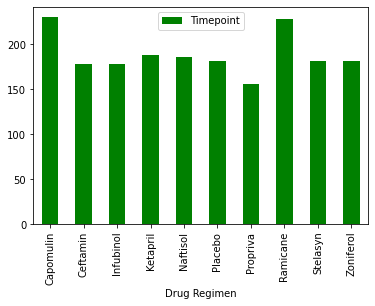

In [16]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
#time = clean.groupby( 'Mouse ID', Drug Regimen')[ 'Timepoint'].unique() 
#time
regimen_types = clean.groupby('Drug Regimen')['Timepoint'].count().reset_index()
regimen_types


                                              
Bar = regimen_types.plot(x='Drug Regimen', y= ['Timepoint'], kind="bar", color= "green")
plt.show()


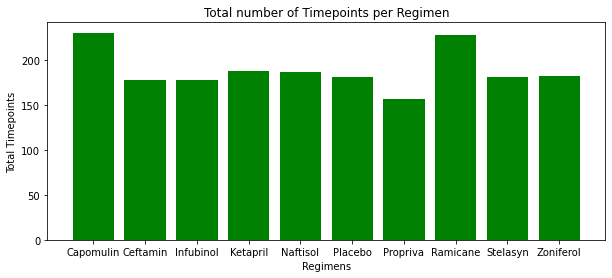

In [17]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.figure(figsize=(10,4))
plt.bar(regimen_types['Drug Regimen'],regimen_types['Timepoint'], color= "green",)
plt.title("Total number of Timepoints per Regimen")
plt.xlabel("Regimens")
plt.ylabel("Total Timepoints")
plt.show()


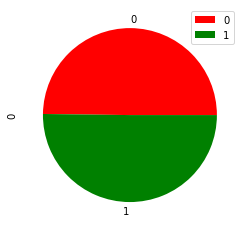

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_totals = mouse_metadata.groupby(['Sex']).size().reset_index()
#totals = gender_totals.rename(columns={"0":"Genders"})
#totals
colors = ['red','green']
gender_totals.plot.pie(y=0, colors= colors)
plt.show()

(-1.1016630746735625,
 1.1000791940320744,
 -1.1017685314144794,
 1.1009347297692742)

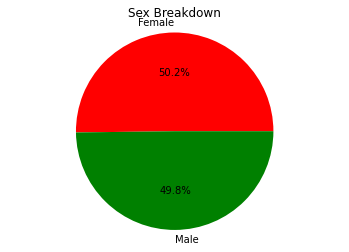

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
y =[125,124]
genders= 'Female','Male'
plt.pie(y, labels=genders,startangle=360, colors= colors,autopct='%1.1f%%')
plt.title("Sex Breakdown")
plt.axis('equal')

## Quartiles, Outliers and Boxplots

In [20]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
regimen = clean[(clean["Drug Regimen"] == "Capomulin") |
                        (clean["Drug Regimen"] == "Ramicane")  |
                        (clean["Drug Regimen"] == "Infubinol") |
                        (clean["Drug Regimen"] == "Ceftamin")
                       ]
max_timepoint = regimen.groupby("Mouse ID")["Timepoint"].max()
max_timepoint = pd.DataFrame(max_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merging_drug = pd.merge(max_timepoint, clean, on=("Mouse ID","Timepoint"), how = 'left')
merge_drug = pd.DataFrame(merging_drug)
merge_drug


,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [21]:
# Put treatments into a list for for loop (and later for plot labels)
#breakdown = last_counts.idxmax(axis = 1)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data_list = []
outlier =[]

for treatment in treatments:
    print(f"{treatment}:")
    tumor_vol_data = merge_drug.loc[merge_drug["Drug Regimen"] == treatment, :]
    
    tumor_vol_data_list.append(tumor_vol_data['Tumor Volume (mm3)'])

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    quartiles = tumor_vol_data['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
    IQR = quartiles[0.75] - quartiles[0.25]
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds 
    lower_bound = quartiles[0.25] - (1.5*IQR)
    upper_bound = quartiles[0.75] + (1.5*IQR)
    print(f"The first quartile of {treatment} is {quartiles[0.25]}")
    print(f"The median value of {treatment} is {quartiles[.5]}")
    print(f"The third quartile of {treatment} is {quartiles[0.75]}")
    print(f"The IQR value of {treatment} is {IQR}")
    print(f"The outliers of {treatment} would be below {lower_bound}")
    print(f"The outliers of {treatment} would be above {upper_bound}")
    print("----------------------------------------------------------\n")
    
    outliers = tumor_vol_data.loc[(tumor_vol_data['Tumor Volume (mm3)'] > upper_bound) |
                                  (tumor_vol_data['Tumor Volume (mm3)'] < lower_bound)]
    outlier.append(outliers)
    

Capomulin:
The first quartile of Capomulin is 32.37735684
The median value of Capomulin is 38.1251644
The third quartile of Capomulin is 40.1592203
The IQR value of Capomulin is 7.781863460000004
The outliers of Capomulin would be below 20.70456164999999
The outliers of Capomulin would be above 51.83201549
----------------------------------------------------------

Ramicane:
The first quartile of Ramicane is 31.56046955
The median value of Ramicane is 36.56165229
The third quartile of Ramicane is 40.65900627
The IQR value of Ramicane is 9.098536719999998
The outliers of Ramicane would be below 17.912664470000003
The outliers of Ramicane would be above 54.30681135
----------------------------------------------------------

Infubinol:
The first quartile of Infubinol is 54.04860769
The median value of Infubinol is 60.16518046
The third quartile of Infubinol is 65.52574285
The IQR value of Infubinol is 11.477135160000003
The outliers of Infubinol would be below 36.83290494999999
The outlie

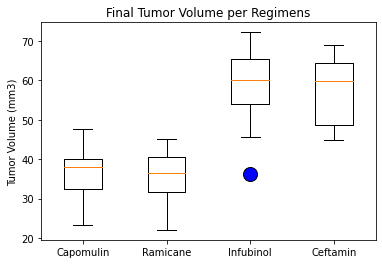

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()
ax.set_title('Final Tumor Volume per Regimens')
ax.set_ylabel('Tumor Volume (mm3)')
props = dict(markerfacecolor = 'blue', markersize = 14)
plt.boxplot(tumor_vol_data_list,labels=treatments,flierprops = props)

plt.show()

## Line and Scatter Plots

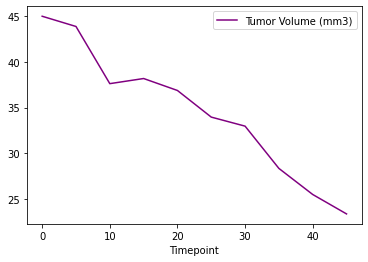

In [23]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
random_MouseID = clean.loc[(clean['Drug Regimen'] == 'Capomulin')].iloc[0]['Mouse ID']
random_data = clean.loc[(clean['Mouse ID'] == random_MouseID)]

random_data.plot(kind='line', x='Timepoint', y='Tumor Volume (mm3)', color="purple")

plt.show()

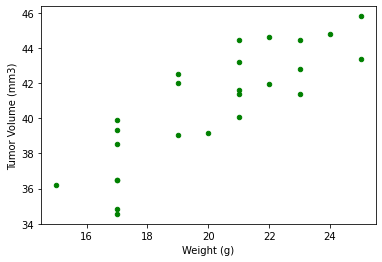

In [24]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_data = clean.loc[(clean['Drug Regimen'] == 'Capomulin')]
avg_volume_data = capomulin_data.groupby("Mouse ID")[['Weight (g)', 'Tumor Volume (mm3)']].mean()

avg_volume_data.plot(kind='scatter', x='Weight (g)', y='Tumor Volume (mm3)', color="green")

plt.show()

## Correlation and Regression

The correlation between Weight(g) and Tumor Volume(mm3) is 0.84


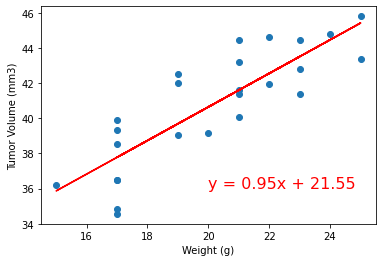

In [32]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
regress_val = avg_volume_data['Weight (g)'] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
plt.plot(avg_volume_data['Weight (g)'],regress_val,"r-")
plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')


# Calculate the correlation
correlation = st.pearsonr(avg_volume_data['Weight (g)'], avg_volume_data['Tumor Volume (mm3)'])
print(f"The correlation between Weight(g) and Tumor Volume(mm3) is {round(correlation[0],2)}")



Observations:

    The first observation to take away from these trials is that the regimens do not work differently depending on sex of species.  As the male and female rats used were split almost evenly at 50.2% being female and 49.8% being male.  The second observation is that out of all of the regimens it seems that Capomulin is the most effective regimen when starting to treat smaller tumors as shown in the box plot and line graph as it has a lower IQR than Ramicane(the other treatment used for smaller tumors). As Infubinol would be best for larger tumors for larger species such as Infubinol and Ceftamin, Infubinol had a larger effect on regressing the size of tumors with similar differences in IQR as seen in the differences between Capomulin and Ramicane.  Lastly by the number of timepoints charted, Campomulin and Ramicane effects on Tumors would be most accurate to have the most time points allowing for a higher accuracy in testing the ability of these regimens.